## Análisis de reviews de base de datos de YELP usando NLP

El análisis en esta notebook incluye: 
- Keywords y tópicos por negocio (business id) 
- Sentimiento de cada review 
- Entidades por review 
- Negocio con más comentarios positivos y negocio con más comentarios negativos

### Caveats

LOs datos sobre los cuales corre este análisis pueden descargarse de https://raw.githubusercontent.com/Blassaj
--------------------------------------------------------------------------------

#### Importamos paquetes y los datos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics as stat

Montamos el dataset

In [ ]:
df = pd.read_csv(".../reviews.csv", parse_dates = ['date'], dayfirst = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27290 entries, 0 to 27289
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       27290 non-null  object        
 1   review_id     27290 non-null  object        
 2   text          27290 non-null  object        
 3   votes.cool    27290 non-null  int64         
 4   business_id   27290 non-null  object        
 5   votes.funny   27290 non-null  int64         
 6   stars         27290 non-null  int64         
 7   date          27290 non-null  datetime64[ns]
 8   type          27290 non-null  object        
 9   votes.useful  27290 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 2.1+ MB


In [ ]:
#Tipo de dato de cada atributo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27290 entries, 0 to 27289
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       27290 non-null  object        
 1   review_id     27290 non-null  object        
 2   text          27290 non-null  object        
 3   votes.cool    27290 non-null  int64         
 4   business_id   27290 non-null  object        
 5   votes.funny   27290 non-null  int64         
 6   stars         27290 non-null  int64         
 7   date          27290 non-null  datetime64[ns]
 8   type          27290 non-null  object        
 9   votes.useful  27290 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 2.1+ MB


El datatset es una mezcla de enteros, texto y valores del tipo fecha y hora. Vamos a comprobar si existen nulos:

In [ ]:
#Cantidad de registros nulos por atributo
df.isna().sum()

user_id         0
review_id       0
text            0
votes.cool      0
business_id     0
votes.funny     0
stars           0
date            0
type            0
votes.useful    0
dtype: int64

Esta tabla sugiere que en el dataset no hay valores nulos.

## Análisis de estadística descriptiva

####Variables numéricas

Para conocer la distribución de todas las variables numericas relavantes, creamos una funcion iterable que recorra estas variables y nos devuelva:

- Gráfico de distribución (histograma)
- Gráfico de cajas, para determinar outliers
- Moda (valor más frecuente)
- Media (promedio)
- Mediana (percentil 50%)

Distribución de la variable votes.cool


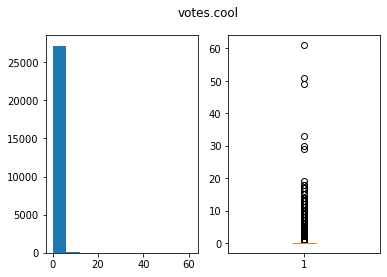

Moda= 0
Media= 0.3921582997434958
Mediana= 0.0


Distribución de la variable votes.funny


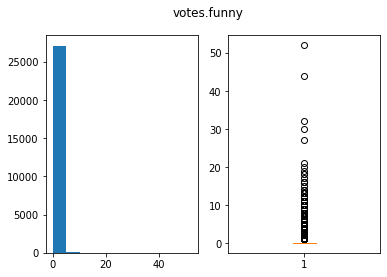

Moda= 0
Media= 0.31953096372297546
Mediana= 0.0


Distribución de la variable stars


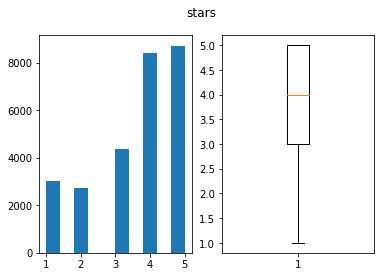

Moda= 5
Media= 3.623231953096372
Mediana= 4.0


Distribución de la variable votes.useful


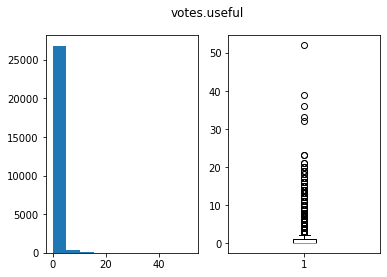

Moda= 0
Media= 0.830157566874313
Mediana= 0.0




In [ ]:
numericas = df[["votes.cool", "votes.funny", "stars", "votes.useful"]]

for elem in numericas:
  print(f"Distribución de la variable {elem}")
  
  # Graficos de histograma y cajas
  fig, axes = plt.subplots(nrows=1, ncols=2)
  fig.suptitle(elem)
  axes[0].hist(numericas[elem])
  axes[1].boxplot(x=elem, data=numericas)
  plt.show()

  # Moda, media y mediana
  moda=stat.mode(numericas[elem])
  print (f"Moda= {moda}")
  print (f"Media= {numericas[elem].mean()}")
  print (f"Mediana= {numericas[elem].median()}", end = "\n\n\n")

In [ ]:
round(df[["votes.cool", "votes.funny", "votes.useful", "stars"]].describe(),2)

,votes.cool,votes.funny,votes.useful,stars
count,27290.00,27290.00,27290.00,27290.00
mean,0.39,0.32,0.83,3.62
std,1.26,1.12,1.61,1.32
min,0.00,0.00,0.00,1.00
25%,0.00,0.00,0.00,3.00
50%,0.00,0.00,0.00,4.00
75%,0.00,0.00,1.00,5.00
max,61.00,52.00,52.00,5.00


Las variables "cool" y "funny" son muy parecidas, por lo que decido quedarme solo con una de ellas.

In [ ]:
df = df.drop(["votes.cool",'type','review_id'], axis = 1)

Vimos más arriba que las variables "useful" y "funny" tienen tantos outliers que no permiten observar bien sus distribuciones. En orden de clarificar sus tendencias y sesgos internos (y además reducir el tamaño del datatset) vamos a aplicar una limpieza de ouliers estableciendo un máximo.

In [ ]:
df = df[df["votes.useful"] <= 30]
df = df[df["votes.funny"] <= 20]

Distribución de la variable votes.funny


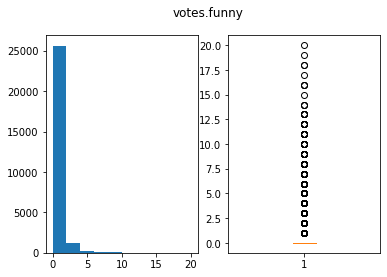

Moda= 0
Media= 0.31206245647472786
Mediana= 0.0


Distribución de la variable stars


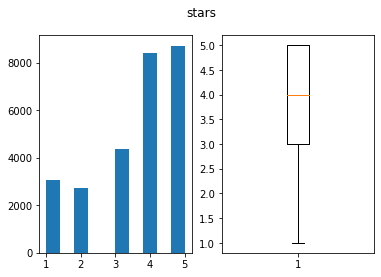

Moda= 5
Media= 3.6229520214052706
Mediana= 4.0


Distribución de la variable votes.useful


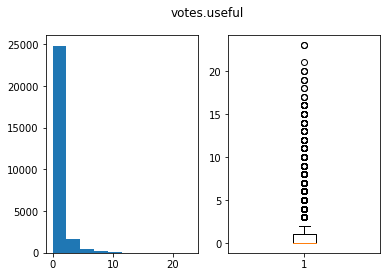

Moda= 0
Media= 0.8221969724737016
Mediana= 0.0




In [ ]:
numericas = df[[ "votes.funny", "stars", "votes.useful"]]

for elem in numericas:
  print(f"Distribución de la variable {elem}")
  
  # Graficos de histograma y cajas
  fig, axes = plt.subplots(nrows=1, ncols=2)
  fig.suptitle(elem)
  axes[0].hist(numericas[elem])
  axes[1].boxplot(x=elem, data=numericas)
  plt.show()

  # Moda, media y mediana
  moda=stat.mode(numericas[elem])
  print (f"Moda= {moda}")
  print (f"Media= {numericas[elem].mean()}")
  print (f"Mediana= {numericas[elem].median()}", end = "\n\n\n")

Descubrimos que la variable funny posee valores la mayoria (82%) de los valores contenidos en esta son iguales a 0 [1], por llo que no seria muy informativa al tener poca variabilidad. Por lo dicho, decidimos eliminarla completamente del dataset.

In [ ]:
#1)
df["votes.funny"].value_counts()
22586/len(df["votes.funny"])

0.827841513030092

#### Variables categoricas y su relacion con variables numéricas

Para comenzar analizamos los parámetros estadísticos básicos de los atributos tipo texto.

In [ ]:

df.describe(include= 'O')

,user_id,text,business_id
count,27283,27283,27283
unique,14860,27262,1320
top,iTmWHtltCtk0Gm55AOxrUA,updated,3Q0QQPnHcJuX1DLCL9G9Cg
freq,113,2,1068


Ahora creamos una lista con los 20 negocios con mas comentarios

In [ ]:
business_x_review = list(df['business_id'].value_counts()[:20].index)

In [ ]:
df['year'] = df['date'].dt.year #Creamos la columna de año
df['month'] = df['date'].dt.month #Creamos la columna de año

Debido a la gran cantidad de Negocios diferentes, vamos a trabajar con los primeros 20 negocios con mas comentarios

In [ ]:
df = df[df['business_id'].isin(business_x_review)]

Por último, contamos la cantidad de comentarios agrupados por números de estrellas y guardamos la figura.

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

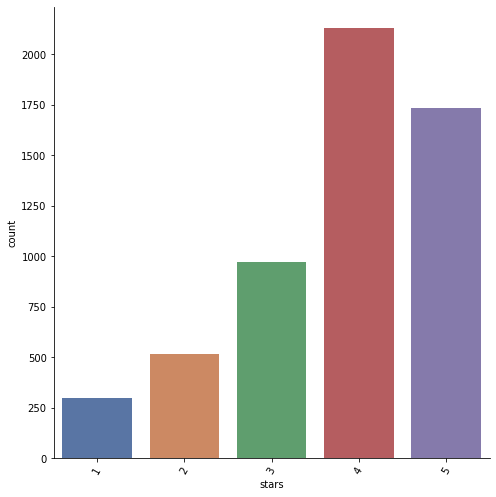

In [ ]:
fig = sns.catplot(x = "stars",kind = "count", data = df, height = 7, palette = "deep")
plt.xticks(rotation=60)
#fig.savefig('/content/drive/MyDrive/Colab Notebooks/TrabajoGrupal/2da entrega/stars.png')

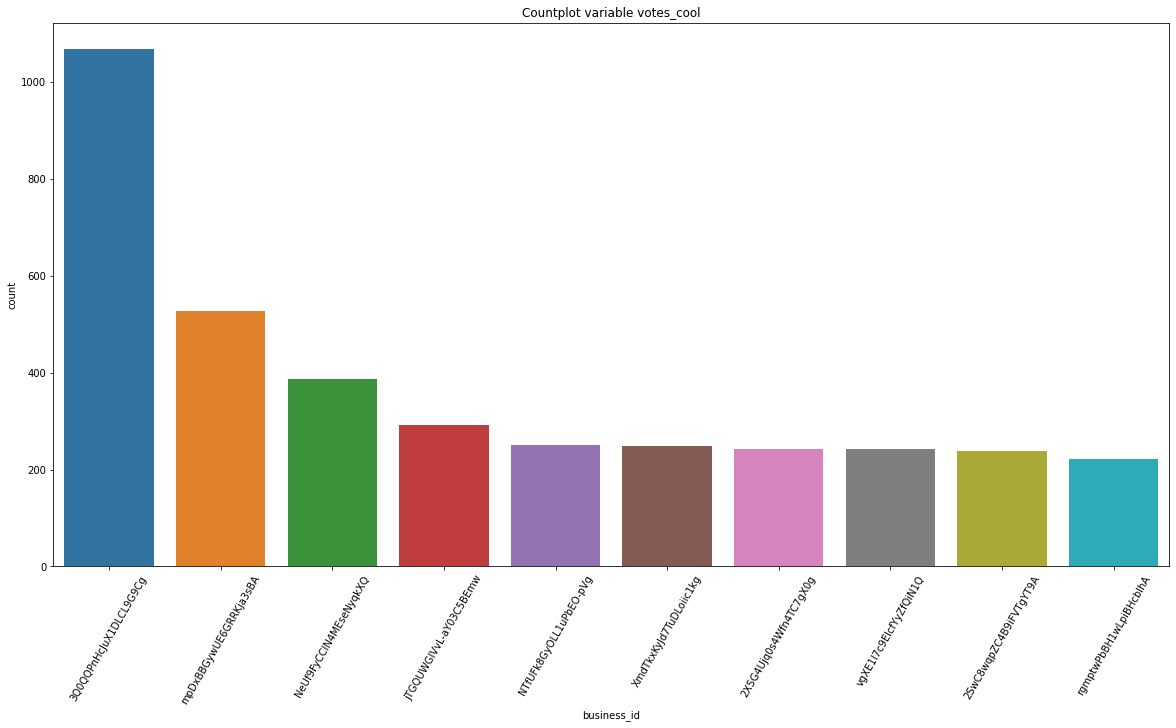

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes()
ax = sns.countplot(x='business_id', data=df, order=df['business_id'].value_counts()[:10].index)
plt.xticks(rotation=60)
plt.title("Countplot variable votes_cool")
plt.show()
#fig.savefig('/content/drive/MyDrive/Colab Notebooks/TrabajoGrupal/2da entrega/reviewsXbusiness.png')

#### **Conclusiones:**
*  Los atributos "votes..." en general no dan mucha información ya que la mayoría de las reviews no tienen votos (salvo votes.useful donde un 42% de las reviews fueron votadas).
*  El atributo "stars" (único ordinal del dataset) contiene la mayor información:
    * El 62% de las reviews tienen más de 4 estrellas (32% y 30%), aproximadamente.
    * Con 3 estrellas solo observamos un 16% de las reviews.
    * El 21% de las reviews tiene 1 o 2 estrellas (11% y 10%), respectivamente.
* Existen negocios que tienen muchas reviews y otros que muy pocas, por lo que el dataset está desbalanceado hacia un tipo particular de nicho comercial. Esperamos poder tener una idea de cual en el analisis de tópicos posterior.
* Es un dataset muy extenso (>20000 reviews) y trabajarlo en su conjunto requeriria un poder computacional mayor al disponible, por lo que de **aqui en adelante solo trabajaremos con un dataset reducido** los primeros 20 negocios con mas comentarios.

## Análisis de texto

Comenzamos importando spaCy y definiendo una función que limpie de stopwords, signos de puntuacion, ponga en minúsculas y lemmatice cada palabra del texto

In [ ]:
#Importamos la libreria spacy y cargamos el idioma con el que vamos a trabajar
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
#Creamos una funcion para transformar el texto a token, pasar todo a minuscula y remover los signos de puntuacion.
def clean_text(text:str):
  """Recibe un texto en formato str,
  elimina los signos de puntuación y
  las denominadas stopwords, devuelve un str"""
  clean_text = []
  for token in nlp(text):
    if not token.is_stop and not token.is_punct and (token.text not in ['\n', '\n\n']):
      clean_text.append(token.lemma_.lower())
  return " ".join(clean_text)

Creamos una columna en el dataset que que almacene la review limpia y vectorizada. Este paso es fundamental para los analisis posteriores.

In [ ]:
df['clean_text'] = df['text'].apply(clean_text)

### Named Entity Recognition (NER)

Vamos a comenzar esta sección almacenando las entidades reconocidas por spaCy en el texto limpio en una columna nueva. Esta es una forma de caracterizar cada review.

In [ ]:
def get_entities(text:str):
  """Recibe un texto en formato str, 
  y devuelve una lista de entidades"""
  doc=nlp(text)
  ents = []
  if doc.ents: 
    for ent in doc.ents:
      ents.append(ent.text)
      
  return ents

In [ ]:
df['entity'] = df['clean_text'].apply(get_entities) #Creamos la Columna de Entidades

### Explode

In [ ]:
df_exp_ner = df.explode('entity')
df_exp_ner.head()

,user_id,text,business_id,votes.funny,stars,date,votes.useful,year,month,clean_text,entity,NOUNS
2332,kdljP-HPIz1SMPZ2-B3NHA,Great stuff here...The cheese plates are great...,2SwC8wqpZC4B9iFVTgYT9A,0,4,2007-04-25,0,2007,4,great stuff cheese plate great change awesome ...,tim waiter,"[stuff, cheese, plate, change, staff, menu, va..."
2333,UzqOYLCssQS2FBcDq5HwkA,This place used to have a great bar/tapas menu...,2SwC8wqpZC4B9iFVTgYT9A,0,4,2007-07-16,1,2007,7,place great bar tapa menu decent selection hap...,$ 10 $,"[bar, tapa, menu, selection, hour, wine, wine,..."
2333,UzqOYLCssQS2FBcDq5HwkA,This place used to have a great bar/tapas menu...,2SwC8wqpZC4B9iFVTgYT9A,0,4,2007-07-16,1,2007,7,place great bar tapa menu decent selection hap...,chevre croquette,"[bar, tapa, menu, selection, hour, wine, wine,..."
2333,UzqOYLCssQS2FBcDq5HwkA,This place used to have a great bar/tapas menu...,2SwC8wqpZC4B9iFVTgYT9A,0,4,2007-07-16,1,2007,7,place great bar tapa menu decent selection hap...,7,"[bar, tapa, menu, selection, hour, wine, wine,..."
2333,UzqOYLCssQS2FBcDq5HwkA,This place used to have a great bar/tapas menu...,2SwC8wqpZC4B9iFVTgYT9A,0,4,2007-07-16,1,2007,7,place great bar tapa menu decent selection hap...,29,"[bar, tapa, menu, selection, hour, wine, wine,..."


Ahora condensamos la informacion que veniamos trabajando para agrupar las entidades(NER), para ver cuales son las entidades que más se repiten en nuestro set de reviews

In [ ]:
df_exp_ner.groupby("entity").count().sort_values(by="text", ascending=False)[['text']].head(10)

,text
entity,
italian,367
mac,281
french,257
2,243
3,213
second,212
5,209
sunday,161
night,154


Conclusion:

- Las entidades que  más se repiten tienen  que ver con el tipo de comida servida y entidades temporales (dia y franja horaria).

### Textblob

Continuamos asignando la polaridad (sentimiento a cada review). Para eso, utilizamos TextBLob, un modelo de aprendizaje profundo pre entrenado.

In [ ]:
from textblob import TextBlob

In [ ]:
#Definimos una función que nos clasifique las reviews en positivas, neutrales o negativas en función de la polarity.
def get_sentiment(text):
  sent = TextBlob(text).sentiment.polarity

  if sent > 0.1:
    return "POS"
  
  if sent >= -0.1 and sent <= 0.1:
    return "NEU"

  if sent < 0.1:
    return "NEG"

In [ ]:
df['polarity'] = df['text'].apply(get_sentiment) #Definimos la columna de sentimientos

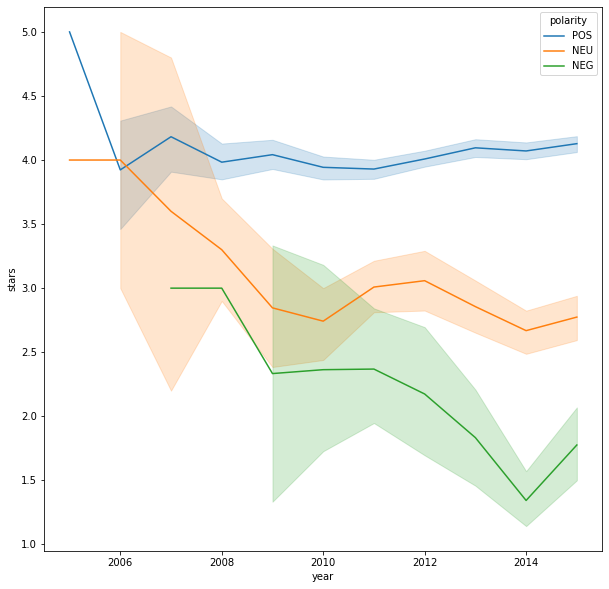

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.lineplot(data=df, x='year', y="stars", hue = 'polarity')
#fig.savefig(f'/content/drive/MyDrive/Colab Notebooks/TrabajoGrupal/2da entrega/reviewsXyear.png')

Es muy destacable que la polaridad postiva se mantiene estable a lo largo del eje temporal en nuestro dataset.

#### Negocio con más comentarios positivos y negativos

In [ ]:
# Obtenemos el negocio con mas comentarios positivos.
df[df['polarity'] == 'POS']['business_id'].value_counts().head(3)

3Q0QQPnHcJuX1DLCL9G9Cg    741
mpDxBBGywUE6GRRKja3sBA    399
NeUf9FyCCIN4MEseNyqkXQ    277
Name: business_id, dtype: int64

In [ ]:
# Obtenemos el negocio con mas comentarios negativos.
df[df['polarity'] == 'NEG']['business_id'].value_counts().head(3)

3Q0QQPnHcJuX1DLCL9G9Cg    61
NeUf9FyCCIN4MEseNyqkXQ    25
mpDxBBGywUE6GRRKja3sBA    14
Name: business_id, dtype: int64

### Word Cloud

Vamos a graficar la frecuencia de las palabras en un gráfico del tipo nube de palabras.

In [ ]:
#Instalamos la librería y la cargamos en nuestro notebook
!pip install wordcloud

from wordcloud import WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Vamos a graficar el wordcloud en función de polaridad positiva y negativa.

In [ ]:
entidades_POS= df[(df['polarity'] == 'POS') & df['business_id'].isin(business_x_review)]['text']
entidades_NEG= df[(df['polarity'] == 'NEG') & df['business_id'].isin(business_x_review)]['text']

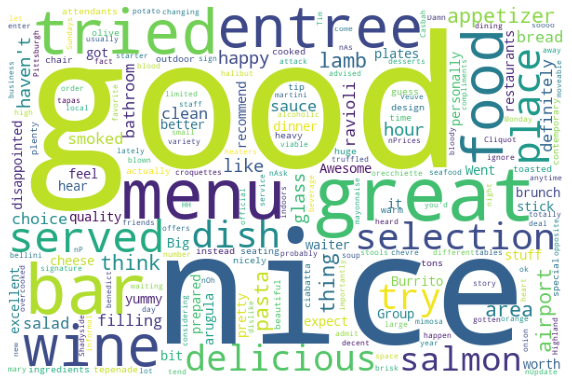

In [ ]:
#Generamos la visualización con los textos de reviews depurados
word_cloud1 = WordCloud(collocations = False,
                       background_color = 'white',
                       width = 600, height = 400,
                       stopwords = nlp.Defaults.stop_words, 
                       ).generate(str(entidades_POS.explode().values))

#Ploteamos la wordcloud
plt.figure(figsize=(10,15))
plt.imshow(word_cloud1)
plt.axis("off")
plt.show()

Las palabras mas repetidas en el conjunto de polaridad postiva son good, nice, great, entree, salmon, etc.

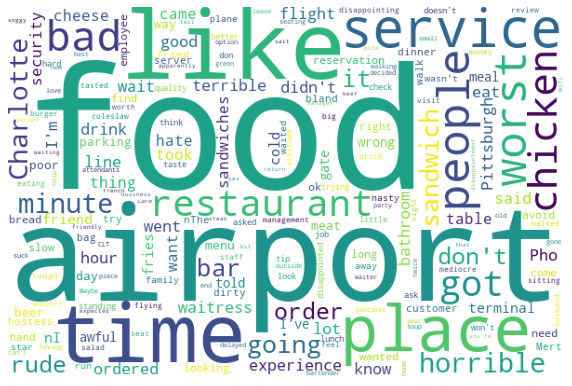

In [ ]:
word_cloud2 = WordCloud(collocations = False,
                       background_color = 'white',
                       width = 600, height = 400,
                       stopwords = nlp.Defaults.stop_words, 
                       ).generate(str(entidades_NEG.explode().values))

#Ploteamos la wordcloud
plt.figure(figsize=(10,15))
plt.imshow(word_cloud2)
plt.axis("off")
plt.show()

Las palabras mas repetidas en el conjunto de polaridad negativa son food, airport, like, time, etc.

Ahora que podemos analizar polaridad, aprovechamos que tenemos la fecha en formato date/time para poder analizar la polaridad de las reviews en el tiempo.

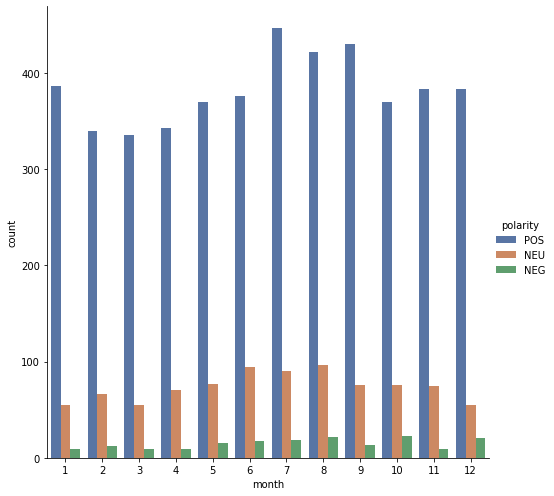

In [ ]:
#Comentarios discriminados por mes, clasificados por tipo de sentimientos
sns.catplot(x = "month", hue = "polarity", kind = "count", data = df, height = 7, palette = "deep")

<Figure size 720x720 with 0 Axes>

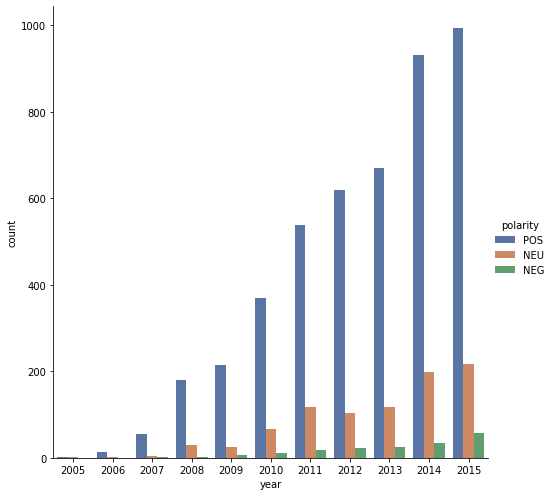

In [ ]:
#Cantidad de comentarios a lo largo de los años
fig = plt.figure(figsize=(10,10))
sns.catplot(x = "year", hue = "polarity", kind = "count", data = df, height = 7, palette = "deep")

Queda claro que por los graficos que hay un sesgo de comentrarios positivos a lo largo del tiempo. Las valoraciones neutras fluctuan, pero las posotivas y negativas tienden a crecer con el tiempo.

### Tópicos

Ahora analizamos los topicos que más se repiten en nuestra reviews, agrupandolas en una columna por nombre y popularidad.

In [ ]:
!pip install bertopic

from bertopic import BERTopic

topic_model = BERTopic(calculate_probabilities=True, verbose=True, min_topic_size= 5)
#topics, probs = topic_model.fit_transform(df["text"].values)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76 kB 2.6 MB/s 
     |████████████████████████████████| 88 kB 6.7 MB/s 
     |████████████████████████████████| 5.2 MB 48.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 85 kB 4.9 MB/s 
     |████████████████████████████████| 4.4 MB 41.5 MB/s 
     |████████████████████████████████| 1.2 MB 31.4 MB/s 
     |████████████████████████████████| 101 kB 11.0 MB/s 
     |████████████████████████████████| 636 kB 59.5 MB/s 
     |████████████████████████████████| 6.6 MB 40.6 MB/s 
     |████████████████████████████████| 1.1 MB 33.5 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2342127 sha256=3d65a74f332338f4a8e3cebd6f21eb2c19739c3912a309737bd8ae80151504da
  Stored in directory: /root/.cache

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Batches:   0%|          | 0/177 [00:00<?, ?it/s]

2022-07-24 23:14:23,946 - BERTopic - Transformed documents to Embeddings
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
2022-07-24 23:15:03,741 - BERTopic - Reduced dimensionality
2022-07-24 23:15:08,232 - BERTopic - Clustered reduced embeddings


In [ ]:
topics, probs = topic_model.fit_transform(df["clean_text"].values)

Batches:   0%|          | 0/177 [00:00<?, ?it/s]

2022-07-24 23:26:38,454 - BERTopic - Transformed documents to Embeddings
2022-07-24 23:26:56,037 - BERTopic - Reduced dimensionality
2022-07-24 23:27:00,083 - BERTopic - Clustered reduced embeddings


In [ ]:
topics_data = topic_model.get_topic_info()
topics_data

,Topic,Count,Name
0,-1,1710,-1_good_food_great_order
1,0,1057,0_airport_flight_terminal_gate
2,1,321,1_pancake_breakfast_pamela_hotcake
3,2,267,2_beer_dog_selection_cave
4,3,181,3_ask_server_waitress_table
...,...,...,...
97,96,6,96_love_jan32014_drinks_ahhh
98,97,5,97_macroni_particularly_lard_ham
99,98,5,98_drink_biersch_gordon_strong
100,99,5,99_crawfish_gumbo_tilipia_18mo


In [ ]:
df["TOPIC_ID"] = topics
df = df.merge(topics_data, left_on="TOPIC_ID", right_on="Topic", how="left")
df = df.rename(columns={"Name": "TOPIC_NAME", "Count": "TOPIC_POPULARITY"})
df = df.drop(["Topic"], axis=1)
df.head()

,user_id,text,business_id,votes.funny,stars,date,votes.useful,year,month,clean_text,entity,NOUNS,polarity,TOPIC_ID,TOPIC_POPULARITY,TOPIC_NAME,TOPIC_POPULARITY,TOPIC_NAME
0,kdljP-HPIz1SMPZ2-B3NHA,Great stuff here...The cheese plates are great...,2SwC8wqpZC4B9iFVTgYT9A,0,4,2007-04-25,0,2007,4,great stuff cheese plate great change awesome ...,[tim waiter],"[stuff, cheese, plate, change, staff, menu, va...",POS,60,1403,-1_was_the_and_we,10,60_1095_reuben_goat_cheese
1,UzqOYLCssQS2FBcDq5HwkA,This place used to have a great bar/tapas menu...,2SwC8wqpZC4B9iFVTgYT9A,0,4,2007-07-16,1,2007,7,place great bar tapa menu decent selection hap...,"[$ 10 $, chevre croquette, 7, 29, 20, 16, 22]","[bar, tapa, menu, selection, hour, wine, wine,...",POS,-1,1403,-1_was_the_and_we,1710,-1_good_food_great_order
2,TckShYnQa0eD3WQxdoE3GQ,Well it's official Shadyside is becoming my ne...,2SwC8wqpZC4B9iFVTgYT9A,0,4,2008-06-24,1,2008,6,official shadyside new favorite area restauran...,"[monday, 5, 10, crouton, waiter, mac, al dente...","[area, restaurant, group, design, service, pla...",POS,6,1403,-1_was_the_and_we,84,6_table_bread_restaurant_dish
3,5e90VuDs5VFSt99T3PSzBA,As the reviews of Casbah appear to be particul...,2SwC8wqpZC4B9iFVTgYT9A,0,5,2008-06-24,1,2008,6,review casbah appear particularly long wind pl...,[],"[wind, place, ish, menu, atmosphere, date, res...",POS,21,28,26_casbah_is_service_rib,41,21_casbah_brunch_burrito_pasta
4,GSKY-zWTManYbMGXmRDb3g,The food here is pretty good. Comparable to a...,2SwC8wqpZC4B9iFVTgYT9A,0,4,2008-07-16,2,2008,7,food pretty good comparable 3 3.5 star resta...,[3 3.5],"[food, star, restaurant, lamb, date, restauran...",POS,22,409,1_sandwich_fries_pittsburgh_sandwiches,37,22_pittsburgh_burger_good_steak


Es tabla nos dice que:

- El tópico mas recurrente en las reviews es sobre comida y la mayoria tiene polaridad positiva [1], recibiendo puntuaciones altas[2].

In [ ]:
#1) 
by_topic = df.groupby("TOPIC_ID")
by_topic["polarity"].value_counts()

TOPIC_ID  polarity
-1        POS         1434
          NEU          240
          NEG           36
 0        POS          736
          NEU          261
                      ... 
 97       POS            4
          NEU            1
 98       POS            5
 99       POS            5
 100      POS            5
Name: polarity, Length: 190, dtype: int64

In [ ]:
#2)
by_topic["stars"].value_counts()

TOPIC_ID  stars
-1        4        653
          5        553
          3        270
          2        172
          1         62
                  ... 
 99       4          4
          5          1
 100      4          3
          3          1
          5          1
Name: stars, Length: 375, dtype: int64

Por último, graficamos los topicos en un mismo plano.

In [ ]:
topic_model.visualize_topics()

Podemos concluir que:

- El dataset posee varios grupos de tópicos generales.
- El dataset se puede dividir en grandes topicos: los referidos a comida asiatica, del sur de EEUU y los referidos a negocios que sirven pasta.
- Existe un cluster de reviews negativas que se ubican arriba en el cuadrante 1, en sentido horario.

### Keywords

Para finalizar el análisis vamos a buscar las palabras claves de cada una de las reviews, usando un modelo de aprendizaje profundo pre entrenado.

In [ ]:
#Primero instalamos la librería ya que no viene por defecto en colab
!pip install keybert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 4.8 MB/s 
     |████████████████████████████████| 51 kB 7.8 MB/s 
  Created wheel for keybert: filename=keybert-0.5.1-py3-none-any.whl size=21332 sha256=898245f8ed3337ac0df6f2b64864ea61a62547de74ee44abdc43ab62dea58111
  Stored in directory: /root/.cache/pip/wheels/8e/95/c5/f5ceed2a9f9e80bc1a706a10a6fb03d726df7a3dd11800a58b
Successfully built keybert


In [ ]:
#Cargamos un modelo pre entrenado para encontrar las keywords de cada review
from keybert import KeyBERT

kw_model = KeyBERT()

In [ ]:
%%time
df["KEYWORDS"] = df.clean_text.apply(lambda x: kw_model.extract_keywords(x, top_n=3, keyphrase_ngram_range=(1,1)))

df.head()

In [ ]:
#Eliminamos el score y nos quedamos con las keyword unicamente
df["KEYWORDS"] = df.KEYWORDS.apply(lambda keywords: [k[0] for k in keywords])

In [ ]:
#Separamos las keywords de cada review
df_exp_key = df.explode('KEYWORDS')

In [ ]:
key_sent = df_exp_key.groupby(['KEYWORDS','SENTIMENT'], as_index= False).agg({'text':'count'})

In [ ]:
#Top5 de keywords en reviews positivas
key_sent[key_sent['SENTIMENT']=='POS'].sort_values(by= 'text', ascending= False).head()

In [ ]:
#Top5 de keywords en reviews negativas
key_sent[key_sent['SENTIMENT']=='NEG'].sort_values(by= 'text', ascending= False).head()

# Conclusión final

- El dataset es muy grande y sobrepasa nuestras capacidades materiales de cómputo, por lo que las conclusiones parciales están sesgadas a la submuestra que seleccionamos.
- El dataset tiene una mezcla de tipo de variables, pero algunas no son muy informativas (por ejemplo, type, votes.cool, votes.funny, etc.). Estas variables fueron manejadas adecuadamente.
- La variable date nos permitio descubrir de informacion dentro del dataset, donde las observaciones se van haciendo mas numerosas a medida que pasa el tiempo. Esto podria estar escondiendo la variabilidad/información de las observaciones mas antiguas.
- Al analizar las variable "business_id" encontramos que hay negocios que tienen muchas opiniones y algunos muy pocas. Esto constituye un sesgo hacia los nichos comerciales de los negocios que tienen mas observaciones en el dataset.
- El analisis de polaridad nos arrojó una nube de palabras asociadas a sentimientos positivos y negativos que estan bien agrupada y son diferentes.
- El analisis de Tópicos en las reviews nos permitio encontrar clusters o grupos de topicos relacionados (por ejemplo, las reviews de comidas asiaticas se encuentran en el cuadrante 3, en sentido horario).
- Los tópicos más recurrentes con valoraciones positivas son aquellos relacionados con comida (pancakes, hotdog, etc) y relacionados a terminales de tránsito (airport, terminal ,etc.).
- En su conjunto, el analisis nos sugiere que los negocios que más opiniones tienen en el dataset son aquellos ubicados en lugares muy transitados. La mayoria de estas valoraciones tiene una polaridad postiva, con puntuaciones (estrellas) >3.